In [85]:
# The package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
import itertools
import random
from scipy.special import expit
from mlxtend.plotting import plot_decision_regions


# Display plots inline
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

(200, 2)
(200,)


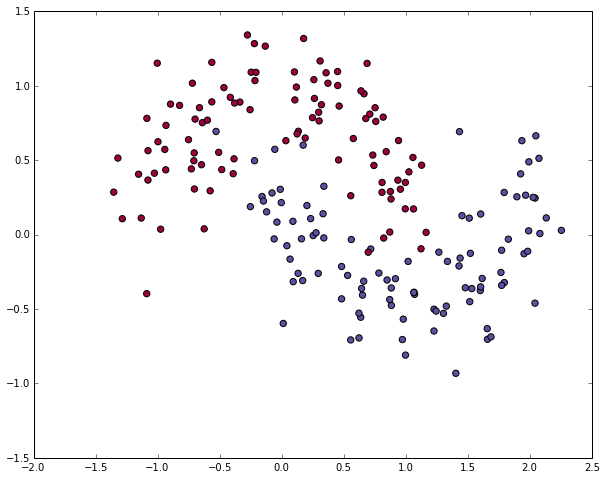

In [86]:
# Create a random dataset and plot

np.random.seed(0)
xTrain,yTrain = sklearn.datasets.make_moons(200,noise=0.20)

print xTrain.shape
print yTrain.shape

plt.scatter(xTrain[:,0], xTrain[:,1], s=40, c=yTrain, cmap=plt.cm.Spectral)

In [75]:
#Lets try the Logistic Regression Classifier

logistic_clf = sklearn.linear_model.LogisticRegressionCV()
logistic_clf.fit(xTrain,yTrain)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

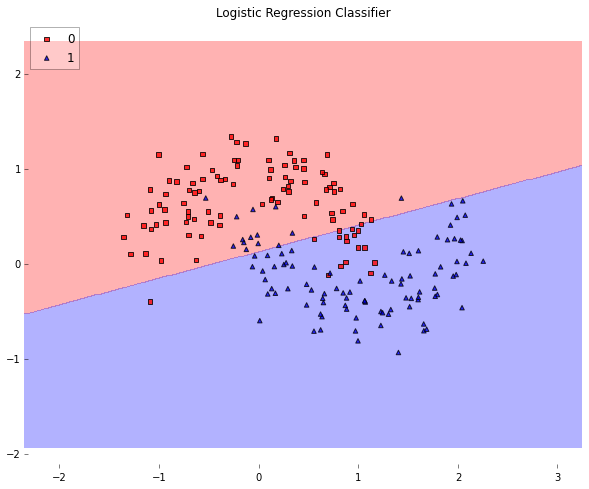

In [76]:
plot_decision_regions(xTrain,yTrain,clf=logistic_clf,res=0.01,legend=2)
plt.title('Logistic Regression Classifier')
plt.show()

# Helper Functions for the Neural Network

Let's define sigmoid function as the activation function for both the hidden and the output layers.



In [77]:
def sigmoid(x):
    """ returns the sigmoid of x """ 
    output = 1/(1 + np.exp(-x))
    return output

def sigmoid_output_derivative(output):
    """ calculates the derivative part for backpropagation """ 
    return np.dot(output,(1 - output))

def one_hot_encode(y,n,num_classes):
    """ Multiple classes exist in the training data, so this function does the one-hot-encoding """ 
    yTrain = np.zeros((n,num_classes))
    index = 0
    for toBeEncoded in y:
        num =  int(toBeEncoded)
        yTrain[index,num-1] = 1
#         print str(num) + " , " + str(yTrain[index])
        index = index + 1
    return yTrain
    
def init_W(n,d):
    """ Initialize random weights between -0.1 and 0.1 """ 
#     random.seed(0.001)
    W = np.zeros((n,d))
    for i in range(n):
        for j in range(d):
            W[i,j] = random.uniform(-0.1,0.1)
    return W


def ReLU(output):
    """ Relu activation """ 
    X = [max(0,x) for x in output]
    return X

def ReLU_deriv(output):   
    """ Relu derivative for backpropagation """ 
    X = [1 if x > 0 else 0 for x in output]
    x = np.asarray(X)
    return x

def feedforward(xi,W,Wdash,ReLUVar):
    """ Calculate the feedforward values """ 
    # Layer 1 is the hidden layer
    net_layer_1 = np.dot(xi,W)
    if(ReLUVar):
        out_layer_1 = np.asarray(ReLU(net_layer_1))
    else:
        out_layer_1 = expit(net_layer_1)
    out_layer_1 = np.append(out_layer_1,[1])
    net_layer_2 = np.dot(out_layer_1,Wdash)
    out_layer_2 = expit(net_layer_2)
    return out_layer_1,out_layer_2

def predict(xi,W,Wdash,ReLUVar):
    """ Calculate the feedforward values """ 
    # Layer 1 is the hidden layer
    net_layer_1 = np.dot(xi,W)
    if(ReLUVar):
        out_layer_1 = np.asarray(ReLU(net_layer_1))
    else:
        out_layer_1 = expit(net_layer_1)
    out_layer_1 = np.append(out_layer_1,[1])
    print out_layer_1.shape
    print Wdash.shape
    net_layer_2 = np.dot(out_layer_1,Wdash)
    out_layer_2 = expit(net_layer_2)
    return np.argmax(out_layer_2)

def updateW(W,eta, out_layer, delta_layer):
    """ Update weights after backpropagation """ 
    (n,d) = W.shape
    for i in range(n):
        for j in range(d):
            W[i,j] = W[i,j] - (eta * (out_layer[i] * delta_layer[j]))
    return W
    
def ReLU_Delta(deriv, delta_layer_2,W_dash):
    """ Calculate the deltas if relu is used """ 
    (n,d) = W_dash.shape
    delta_layer_1 = np.zeros(Nh+1)
    for j in range(n):
        sum = 0
        for k in range(d):
            sum = sum + (delta_layer_2[k] * W_dash[j,k])
        delta_layer_1[j] = deriv[j] * sum
    return delta_layer_1
    

def backpropagation(yhat_i,y_i,xi,out_layer_1,eta,W,W_dash,ReLUVar):
    # for output layer
    #oj - tj term
    error_layer_2 = yhat_i - y_i
    # calculating delta = (oj - tj) * oj * (1-oj)
    delta_layer_2 = np.dot(error_layer_2,sigmoid_output_derivative(yhat_i))

    # for hidden layer
    if(ReLUVar):  
        deriv = ReLU_deriv(out_layer_1)
        delta_layer_1 = ReLU_Delta(deriv, delta_layer_2, W_dash)
#         delta_layer_1 = np.dot(deriv, np.dot(delta_layer_2, W_dash.T))
    else:
        delta_layer_1 = np.dot(sigmoid_output_derivative(out_layer_1),np.dot(delta_layer_2,W_dash.T))
    W_dash = updateW(W_dash, eta, out_layer_1, delta_layer_2)
    W      = updateW(W,eta,xi,delta_layer_1)
  

    return W,W_dash

In [78]:
Nh = 3
eta = 0.01
epoch = 10

""" Total number of classes in the training set""" 
num_classes = 2
ReLUVar = False
# Old shape
(n,d) = xTrain.shape
xTrain = np.append(xTrain, np.ones((n,1)),1)
# New shape after appending 1s
(n,d) =  xTrain.shape
yTrain = one_hot_encode(yTrain, n, num_classes)
# print yTrain

# W_b = np.random.uniform(low=-0.1, high = 0.1, size = (d,Nh))
# W_dash = np.random.uniform(low=-0.1,high = 0.1, size = (Nh,7))


# W = np.random.uniform(low=-0.1, high = 0.1, size = (d,Nh))
# W_dash = np.random.uniform(low=-0.1,high = 0.1, size = (Nh+1,num_classes))

W = init_W(d,Nh)    # layer 1 weights i.e. input to hidden
W_dash = init_W(Nh+1,num_classes)   # hidden to output weights


In [79]:
Nh = 3 #Number of neurons in the hidden layer
eta = 0.01 #Used in backpropagation
epoch = 10 #Number of epochs
num_classes = 2 #Number of classes
ReLUVar = False

In [80]:
W = np.random.uniform(low=-0.1, high = 0.1, size = (d,Nh))
W_dash = np.random.uniform(low=-0.1,high = 0.1, size = (Nh+1,num_classes))

print "Shape of W is " + str(W.shape)
print "Shape of W_dash is " + str(W_dash.shape)

Shape of W is (3, 3)
Shape of W_dash is (4, 2)


In [81]:
for e in range(epoch-1):
#     print "Epoch number " + str(e + 1) + " \n"
#     print "\n------------------------------"
    random_order = range(n)
    np.random.shuffle(random_order)
    for xi in range(n):
        out_i = feedforward(xTrain[xi],W, W_dash,ReLUVar)
        yhat_i = out_i[1]
        E = 0.5 * np.linalg.norm(yhat_i - yTrain[xi])**2
        if E > 0:
#             print out_i[0]
            Wout = backpropagation(yhat_i, yTrain[xi], xTrain[xi],out_i[0], eta, W, W_dash,ReLUVar)
            W = Wout[0]
            W_dash = Wout[1]
            
print "The weight vector of shape " + str(W.shape) + " (along with bias) for the input to hidden layer is : \n"
print W
print "--------------------------------------------------------------------"
print "The weight vector of shape " + str(W_dash.shape) + " along with bias for hidden to output layer is : \n"
print W_dash
print "--------------------------------------------------------------------"


The weight vector of shape (3, 3) (along with bias) for the input to hidden layer is : 

[[ 0.48807359 -0.09460507 -0.11651818]
 [-0.44000463 -0.05797041  0.17683267]
 [-0.03907253 -0.08332203  0.10040606]]
--------------------------------------------------------------------
The weight vector of shape (4, 2) along with bias for hidden to output layer is : 

[[ 0.28933278 -0.22571316]
 [-0.02057414  0.03978121]
 [-0.04578451  0.17358829]
 [-0.09652628 -0.01436733]]
--------------------------------------------------------------------


In [82]:
Z = predict(xTrain,W,W_dash,False)
print Z

(601,)
(4, 2)


ValueError: shapes (601,) and (4,2) not aligned: 601 (dim 0) != 4 (dim 0)

In [289]:
for xTest in xTrain:
    plot_decision_boundary(lambda x : predict(xTest,W,W_dash,ReLUVar))

ValueError: cannot reshape array of size 1 into shape (328,461)